<a href="https://www.kaggle.com/code/nipunshakya/compensation-analysis-of-a-us-based-company?scriptVersionId=223565540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Compensation Analysis of a US Based Company

# Unveiling the Truth About Compensation: A Deep Dive into Salaries, Pay Equity, and Market Competitiveness

**_Imagine wanting to change the lives of many through a a game-changing compensation analysis._**

**_You want to uncover the truth about whether employees are fairly compensated, underpaid, or outperforming the market._**

**_You are sure that the results could shape the company’s retention, talent acquisition, and salary structuring strategies for years to come._**

But here’s the challenge: **You don't have real salary data**, because no company wants to share their salary publicly.
Most companies guard their compensation structures and pay trends, making it nearly impossible to perform a compensation study with real-world numbers and share it to the public.

So, how did I get past this barrier? I used a **data-driven approach**—**_randomized sampling of real-world salaries._**

## The Dataset: Real Salaries, Real Insights
This analysis is based on real, crowd-sourced salary data from [AIJobs.net](https://aijobs.net/salaries/download/), a global dataset containing thousands of salary records from professionals in data science, software engineering, and AI-related roles.

### Key Features of the Dataset:
- Global coverage: Salaries reported from multiple countries.
- Role diversity: Compensation details for engineers, analysts, developers, architects, and more.
- Comprehensive compensation breakdown: Includes salary, employment type, experience level, remote work ratio, and company size.

However, because this dataset does not belong to any one company, I had to get creative in simulating a realistic corporate compensation environment.

## The Approach a.k.a assumptions: Randomized Sampling to Simulate a Company

Since real company compensation data is rare, we created a **hypothetical company** by randomly selecting 10% of employees from the U.S. workforce, ensuring fair representation across different job titles using _stratified sampling_.

**Additional assumptions**:
- Designation of the remaining U.S. employees as the **overall market benchmark** to compare salaries.
- Simulation of a **competitor company** by performing a separate random stratified sampling to generate realistic salary competition.
- **You** are the CEO of this "real" company looking forward to read this report.

This method allowed me to analyze key compensation metrics as if I was evaluating a real company, helping business leaders and HR professionals gain insights into salary fairness, internal pay equity, and market competitiveness.

## What You’re About to Discover: The Compensation Mystery Unfolds

This isn’t just a _dry compensation report_ — this is an investigation into how fair and competitive our company’s salaries truly are. 

And the results? Some will shock you.

##### - Are our employees underpaid compared to the market, or are they making 20-30% more than competitors?
##### - Does remote work influence salaries, and are fully remote workers making less than their office-based peers?
##### - Are there hidden pay gaps between employees within the same job title—possibly leading to dissatisfaction and attrition?
##### - Which job roles are significantly underpaid, risking employee turnover, and which ones are "overpaid" compared to the market?
##### - And most importantly—what actions should we take to fix these compensation gaps and ensure our company remains competitive?

By the end of this analysis, you’ll have the answers to these questions and more—arming you with data-driven insights that can drive real organizational change.

## Step 1: Loading and Inspecting the Data

_Checking the structure and understanding what’s included._

In [1]:
pip install ace_tools_open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv("/kaggle/input/compensation-analysis/salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Analyst,84000,EUR,88421,DE,0,DE,L
1,2025,SE,FT,Data Engineer,2700000,INR,31926,IN,50,AU,L
2,2025,MI,FT,Engineer,250000,USD,250000,IN,0,IN,M
3,2025,MI,FT,Engineer,220000,USD,220000,IN,0,IN,M
4,2025,SE,FT,Software Engineer,284000,USD,284000,US,0,US,M


Some explanation of terms:

- experience_level: Entry (EN), Mid (MI), Senior (SI)

- employment_type: Full-time (FT), Contract (CT), Part-time (PT), Freelance (FL)

- company_size: Small (S), Medium (M), Large (L)

### Filling our Company with Employees

Assuming that we are working on 2024's report

In [3]:
# Filter for companies located in the United States and work_year is 2024
df_us = df[(df["company_location"] == "US") & (df["work_year"] == 2024)]

df_us.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3793,2024,EN,FT,Sales Development Representative,112000,SGD,86153,SG,50,US,L
13021,2024,EN,FT,Data Quality Specialist,16100,EUR,17888,PT,100,US,L
14341,2024,SE,FT,Data Developer,131958,USD,131958,US,0,US,M
14342,2024,SE,FT,Data Developer,79175,USD,79175,US,0,US,M
14343,2024,MI,FT,Manager,280000,USD,280000,US,0,US,M


In [4]:
 df_us.shape

(56572, 11)

We have 56,572 employees in the US. 

### Stratified Random Sampling (10% by Job Title)

To create a hypothetical company’s employee dataset, I will:

- Use stratified sampling to ensure fair representation across different job titles.
- Sample 10% of the employees per job title.

This method ensures that our hypothetical company has a diverse representation of job roles, preventing bias toward any single role.

In [5]:
# Perform stratified sampling: 10% of each job title
df_sampled = df_us.groupby("job_title", group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42) if len(x) > 10 else x
)

df_sampled.reset_index(drop=True, inplace=True)

# Display the number of records after sampling
df_sampled.shape

(5973, 11)

After applying _stratified random sampling_, we now have **5,973** employees in our hypothetical company. This dataset maintains the original distribution of job titles while ensuring fair representation.

## Step 2: Exploratory Data Analysis (EDA)

Now, I will conduct an exploratory data analysis (EDA) to understand the salary structure and compensation trends within the company.

Key areas to explore:

- Salary Distribution – How salaries vary across the company.
- Compensation by Experience Level – Identifying pay trends by experience.
- Employment Type & Remote Work Impact – Understanding pay gaps.
- Company Size and Salary Influence – How company size affects pay.

### Salary Distribution

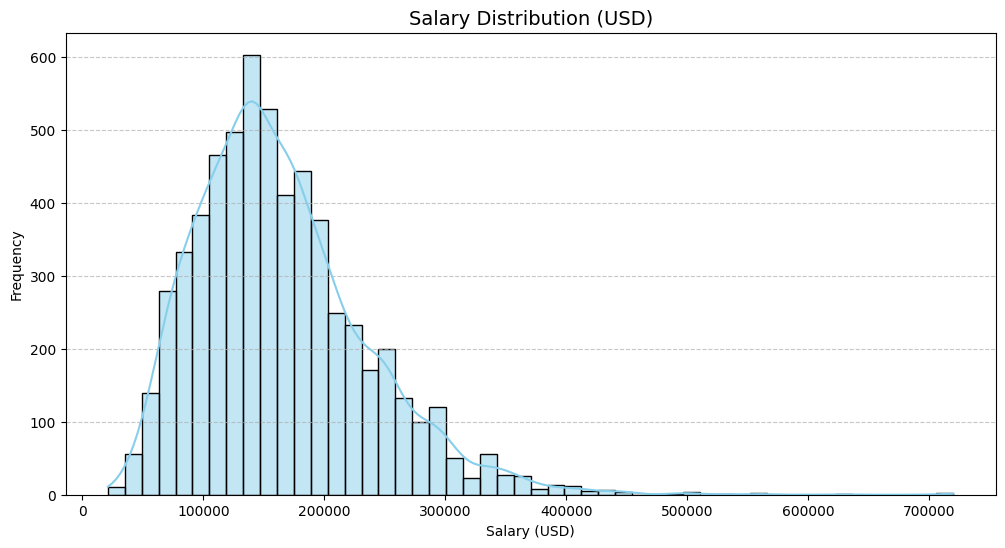

In [6]:
# Setting the plot style
plt.figure(figsize=(12, 6))
sns.histplot(df_sampled["salary_in_usd"], bins=50, kde=True, color="skyblue")

plt.title("Salary Distribution (USD)", fontsize=14)
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Key Insights:

The salary distribution reveals:

- A right-skewed trend, meaning most employees earn lower salaries, while a few earn significantly higher. (typical in a salary distribution)
- A wide salary range, suggesting diverse compensation structures across job titles and experience levels.

### Compensation by Experience Level

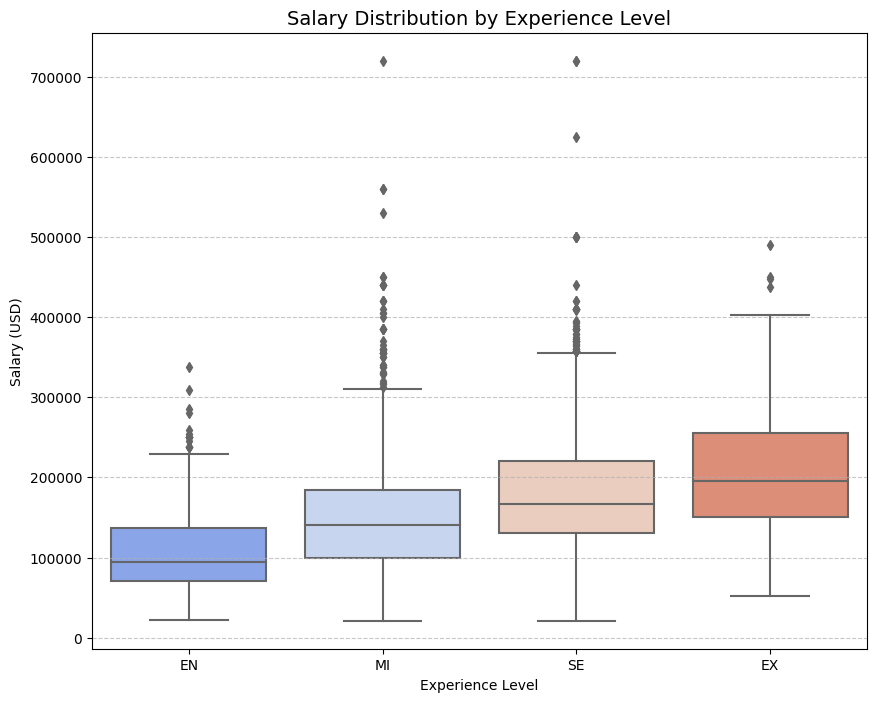

In [7]:
# Boxplot best represents such distribution
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_sampled, x="experience_level", y="salary_in_usd", palette="coolwarm", order=["EN","MI","SE","EX"])

# Titles and labels
plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

#### Key Insights: 

- Median salary progression increase is highest for EN to MI with around 50,000 increase, all other level see only 25,000 increase 
- Entry-Level (EN) and Senior (SE) employees have the lowest median salaries, with slight variation.
- Executive (EX) positions have a higher median pay but also the widest salary range, indicating significant variations in compensation.

This suggests a well-structured salary progression but also raises questions about pay equity among senior roles. 

### Employment Type and Salaries

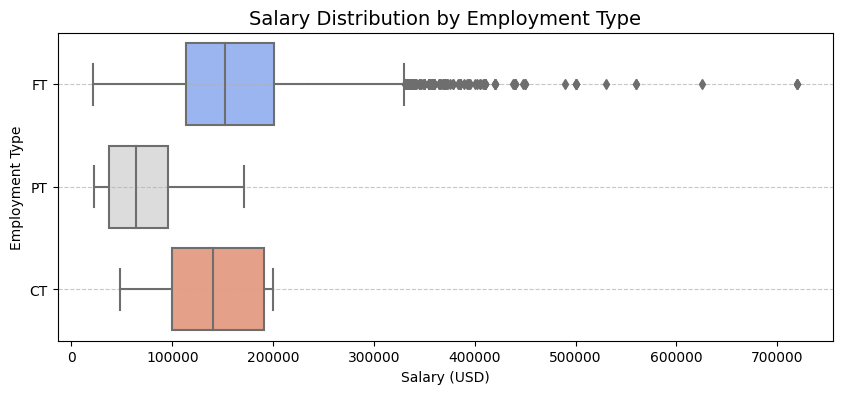

In [8]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sampled, y="employment_type", x="salary_in_usd", palette="coolwarm")

plt.title("Salary Distribution by Employment Type", fontsize=14)
plt.ylabel("Employment Type")
plt.xlabel("Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Key Insights

- Full-Time (FT) employees dominate the dataset and have the highest median salaries.
- Contract (CT) employees have more variation in salaries, likely due to different contract terms.
- Part-Time (PT) roles have significantly lower median salaries, reflecting the nature of these employment types.
- No freelance (FL) employee for the year.

### Remote Work and Compensation

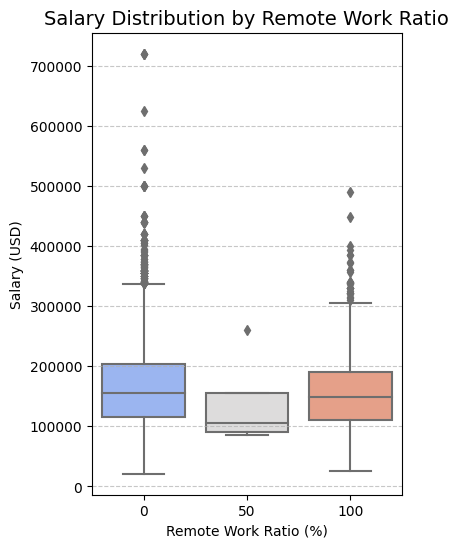

In [9]:
# Boxplot: Salary by Remote Work Ratio
plt.figure(figsize=(4, 6))
sns.boxplot(data=df_sampled, x="remote_ratio", y="salary_in_usd", palette="coolwarm")

plt.title("Salary Distribution by Remote Work Ratio", fontsize=14)
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Key Insights

- On-Site Employees (0% Remote) have a slightly higher median salary.
- Hybrid (50% Remote) employees show the lowest salary range with wider salary distribution, suggesting flexibility in compensation.
- Fully Remote (100% Remote) employees have a slighlty lower median salary than on-site employees, possibly due to cost-of-living adjustments for remote work.

This shows that **hybrid workers earn the lowest and remort work may influence compensation.**

## Step 3: Advanced Compensation Metrics

Compensation metrics provide deeper insights into pay fairness, equity, and competitiveness.

_The entire population of the dataset of US will be assumed to be the market for the purpose of this analysis._

### 3.1: Compa-Ratio

Comparison Ratio, is a metric that shows a comparison of an employee's salary to the market rate (median) for their position.

### Overall company's compa-ratio

In [10]:
# Step 1: Calculate Market Benchmarks (Using Non-Sampled US Employees as Market)
df_market = df_us[~df_us.index.isin(df_sampled.index)]  # Exclude sampled employees

# Calculate market median salary per job title (excluding the sampled company employees)
market_benchmarks = df_market.groupby("job_title")["salary_in_usd"].median().rename("market_median_salary")

# Merge benchmark data with our company dataset
df_sampled = df_sampled.merge(market_benchmarks, on="job_title", how="left")

# Calculate Compa-Ratio (Employee Salary / Market Median Salary)
df_sampled["compa_ratio"] = df_sampled["salary_in_usd"] / df_sampled["market_median_salary"]

# Summary statistics of Compa-Ratio
compa_summary = df_sampled["compa_ratio"].describe()

compa_summary


count    5972.000000
mean        1.065009
std         0.404679
min         0.153005
25%         0.776555
50%         1.000000
75%         1.296799
max         4.800000
Name: compa_ratio, dtype: float64

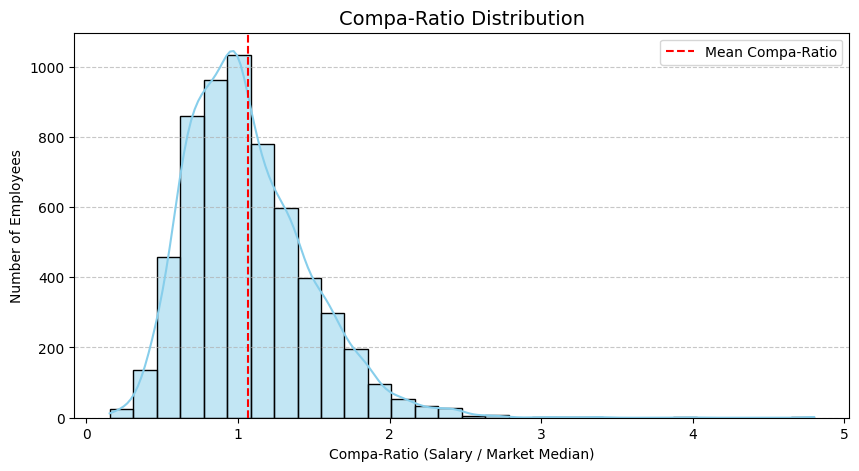

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df_sampled["compa_ratio"], bins=30, kde=True, color="skyblue")
plt.axvline(df_sampled["compa_ratio"].mean(), color="red", linestyle="dashed", label="Mean Compa-Ratio")
plt.title("Compa-Ratio Distribution", fontsize=14)
plt.xlabel("Compa-Ratio (Salary / Market Median)")
plt.ylabel("Number of Employees")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

plt.show()

#### Key Insights: Compa-Ratio Analysis

- Mean Compa-Ratio: 1.06 → Employees earn on average 6% above the market median.
- Median Compa-Ratio: 1.00 → Half of the employees are paid at or below the market rate.
- 25th Percentile: 0.77 → 25% of employees earn below 77% of market median salary, indicating potential underpayment.
- 75th Percentile: 1.29 → 25% of employees earn 29% above market median, suggesting salary premiums for some roles.
- Minimum Compa-Ratio: 0.15 → Some employees are severely underpaid.
- Maximum Compa-Ratio: 4.77 → Certain employees earn over 4.7 times the market median.

This suggests that while overall compensation is competitive, there are salary disparities that need to be addressed.

### Job Title based Compa-Ratio

In [12]:
avg_compa_title = df_sampled.groupby("job_title")["compa_ratio"].mean().rename("avg_compa_ratio").reset_index()

compa_20_above = avg_compa_title[avg_compa_title["avg_compa_ratio"]>1.2][["job_title", "avg_compa_ratio"]]
compa_20_below = avg_compa_title[avg_compa_title["avg_compa_ratio"]<0.8][["job_title", "avg_compa_ratio"]]

compa_20_above.columns = ["Job Title earning over 20% of median", "Compa Ratio"]
compa_20_below.columns = ["Job Title earning below 80% of median", "Compa Ratio"]

# Combine into one DataFrame for display
combined_df = pd.concat([compa_20_above.reset_index(drop=True), compa_20_below.reset_index(drop=True)], axis=1)

# Display DataFrame
tools.display_dataframe_to_user(name="Job Titles with Extreme Compa Ratios", dataframe=combined_df)

Job Titles with Extreme Compa Ratios


#### Key Insights: Title Based Compa-Ratio Analysis

- In aggregate, there are 27 positions that are earning more than 20% of the median pay in the market and 12 titles earning less than 80%.
- Machine Learning Architect is earning double than the median pay
- Machine Learning Developer is severely underpaid with only 45% of the median pay in the industry.

This suggests that in average, our company's compensation strategy is lacking to provide sufficient salaries for several positions while potentially overpaying several positions. More analysis needs to be done.

### 3.2: Range Penetration Ratio

Range penetration is a metric that compares an employee's salary to the range of salaries for their position.

It is essential a range of how much they are paying an employee in comparison to others within the company for their same position.

### Overall company's Range Penetration Ratio

In [13]:
# Calculate Range Penetration Using Actual Min/Max Salary for Each Job Title
min_salary_per_title = df_sampled.groupby("job_title")["salary_in_usd"].min().rename("min_salary_for_title")
max_salary_per_title = df_sampled.groupby("job_title")["salary_in_usd"].max().rename("max_salary_for_title")

# Merge new min/max salary bounds
df_sampled = df_sampled.merge(min_salary_per_title, on="job_title", how="left")
df_sampled = df_sampled.merge(max_salary_per_title, on="job_title", how="left")

# Calculate Range Penetration Ratio: (Salary - Min Salary) / (Max Salary - Min Salary)
df_sampled["range_penetration"] = (df_sampled["salary_in_usd"] - df_sampled["min_salary_for_title"]) / (
    df_sampled["max_salary_for_title"] - df_sampled["min_salary_for_title"]
)

# Clip values between 0 and 1 for proper interpretation
df_sampled["range_penetration"] = df_sampled["range_penetration"].clip(0, 1)

# Summary statistics
range_penetration_summary = df_sampled["range_penetration"].describe()

range_penetration_summary


count    5951.000000
mean        0.358168
std         0.230773
min         0.000000
25%         0.200939
50%         0.312796
75%         0.471292
max         1.000000
Name: range_penetration, dtype: float64

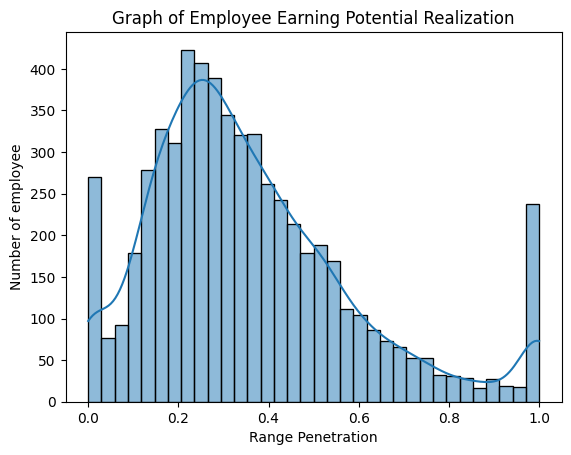

In [14]:
sns.histplot(df_sampled["range_penetration"],kde=True)

plt.title("Graph of Employee Earning Potential Realization")
plt.xlabel("Range Penetration")
plt.ylabel("Number of employee")
plt.show()

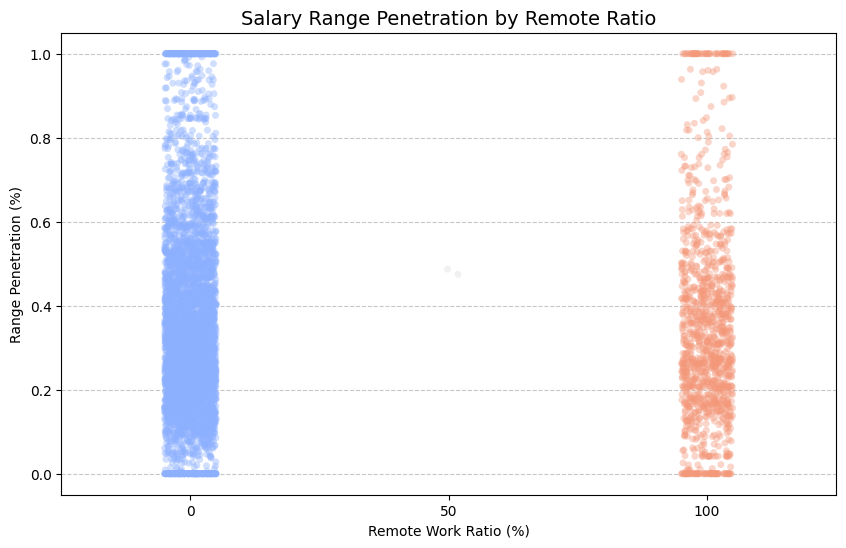

In [15]:
plt.figure(figsize=(10, 6))

sns.stripplot(data=df_sampled, x="remote_ratio", y="range_penetration", jitter=True, alpha=0.4, palette="coolwarm")
plt.title("Salary Range Penetration by Remote Ratio", fontsize=14)
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Range Penetration (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

####  Key Insights: Range Penetration Ratio

- There are not a lot of hybrid workers, but salary penetration rate is low for Fully remote employees, while penetration rate is high for office-going employees.
- Mean Range Penetration: 35.8% → Employees earn, on average, only 35.8% through their expected pay range.
- 25th Percentile: 0% → 25% of employees are only earning 20% of their potential salary range, indicating very few high earners.
- 50th Percentile (Median): 50% of employee earn 31% of their range, further supporting few very high earners.
- 75th Percentile: 75%% of employees are not even earning half of their potential pay range, this confirms that there are few people who are close to their potential pay ceiling (few people are very highly paid)


This suggests that most people are well below on their salary band and only few people might be near their potential salary ceiling. This points to high disparity in salary range for various positions in the company.

Identifying specific Title based analysis will provide a clear picture on this.

### Job Title based Penetration-Ratio

In [16]:
avg_range_pen_title = df_sampled.groupby("job_title")["range_penetration"].mean().rename("avg_range_pen").reset_index()

range_pen_below_30 = avg_range_pen_title[avg_range_pen_title["avg_range_pen"]<0.3][["job_title", "avg_range_pen"]]

# Display DataFrame
tools.display_dataframe_to_user(name="Job Titles with Extreme Range Penetration Ratio", dataframe=range_pen_below_30)

Job Titles with Extreme Range Penetration Ratio


#### Key Insights: Title Based Range Penetration Analysis

- In aggregate, there are 14 positions that have an average range penetration rate of less than 30%. Most of these positions have low pay range penetration.

This suggests that pay structure in positions like Analytics Engineer, Data Management Consultant, Clinical Data Operator, and others are highly varied. Employees might feel unfair because some of their their peers might be earning very high. We will have to restructure the pay or upgrade the high earners to higher position to normalize the range.

### 3.3:  Internal Pay Equity Analysis

Another ratio to identify salary fairness within job titles

In [17]:
# Calculate the median salary per job title
job_title_medians = df_sampled.groupby("job_title")["salary_in_usd"].median().rename("job_title_median_salary")

# Merge back to dataset
df_sampled = df_sampled.merge(job_title_medians, on="job_title", how="left")

# Calculate Internal Pay Equity Ratio (Employee Salary / Median Job Title Salary)
df_sampled["internal_pay_equity_ratio"] = df_sampled["salary_in_usd"] / df_sampled["job_title_median_salary"]

# Summary statistics for internal pay equity
internal_pay_equity_summary = df_sampled["internal_pay_equity_ratio"].describe()

internal_pay_equity_summary


count    5973.000000
mean        1.061823
std         0.401556
min         0.155556
25%         0.777778
50%         1.000000
75%         1.285714
max         4.800000
Name: internal_pay_equity_ratio, dtype: float64

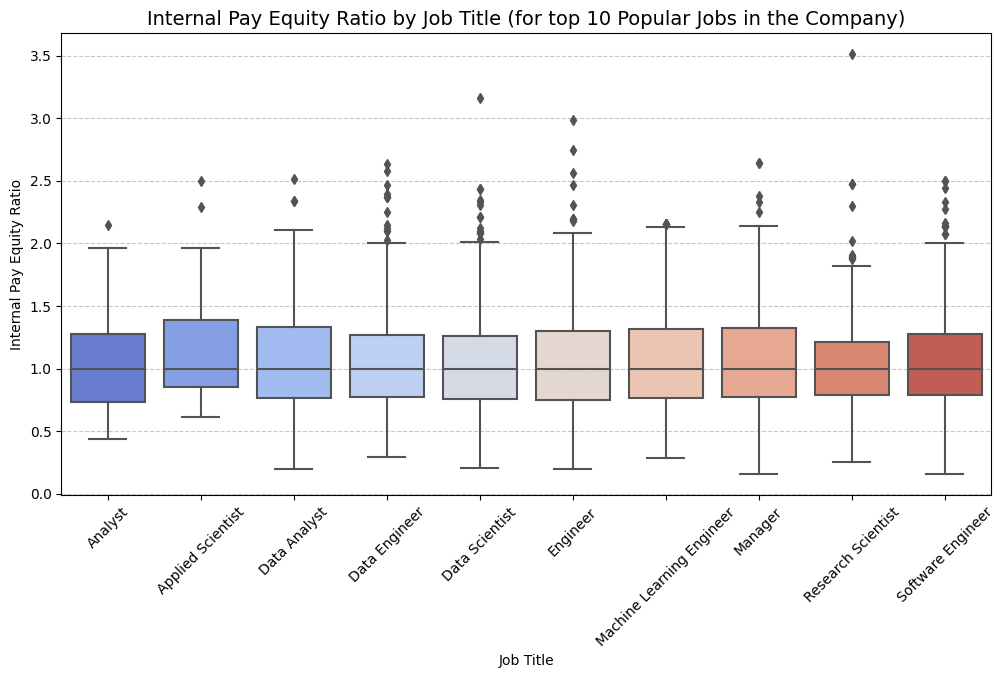

In [18]:
plt.figure(figsize=(12, 6))
top_jobs = df_sampled["job_title"].value_counts().head(10).index  # Select top 10 most frequent job titles
df_filtered = df_sampled[df_sampled["job_title"].isin(top_jobs)]
sns.boxplot(data=df_filtered, x="job_title", y="internal_pay_equity_ratio", palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Internal Pay Equity Ratio by Job Title (for top 10 Popular Jobs in the Company)", fontsize=14)
plt.xlabel("Job Title")
plt.ylabel("Internal Pay Equity Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Key Insights: Internal Pay Equity Analysis

- Mean Pay Equity Ratio: 1.06, meaning employees earn 6% above the median salary for their job title on average.
- Median Pay Equity Ratio: 1.00, indicating that half the employees earn at or below their job title's median pay.
- 25th Percentile: 0.77, meaning 25% of employees earn less than 77% of their job title's median salary, suggesting potential under-compensation.
- 75th Percentile: 1.28, showing that 25% of employees earn at least 28% above their job title's median salary, potentially creating internal pay disparities.
- Minimum Ratio: 0.13, indicating some employees earn far below their job's median pay.
- Maximum Ratio: 4.77, suggesting possible pay anomalies where some employees earn nearly 5x the median salary for their job title.


This analysis highlights potential pay inequities within job roles, requiring further investigation into salary adjustments.

### 3.4: Gender Pay Gap Analysis

Without gender information we cannot perform this analysis. 

We again use statistics to assume random gender assignment for our company with a 50% - 50% male female ratio.

I know this does not represent a real life scenario, but for analytical process point of view I wanted to see what the results would be.

In [19]:
# Gender Pay Gap Analysis

# There's no gender column, let's simulate a gender split for analysis purposes

# Simulating gender (50% Male, 50% Female for demonstration)
np.random.seed(42)
df_sampled["gender"] = np.random.choice(["Male", "Female"], size=len(df_sampled))

# Calculate average salary by gender
gender_salary = df_sampled.groupby("gender")["salary_in_usd"].mean()

# Gender pay gap percentage
gender_pay_gap = (gender_salary["Male"] - gender_salary["Female"]) / gender_salary["Male"] * 100

gender_salary, gender_pay_gap


(gender
 Female    165055.102460
 Male      163009.096474
 Name: salary_in_usd, dtype: float64,
 -1.2551483511893062)

In our company, females are earning more than the male. There does not seem to be any gneder pay gap here.

### 3.5: Total Cost to Company (CTC) and Cost per Employee (CPE)

Since we only have salary component, we will just use this without any other components of salary.

In [20]:
total_ctc = df_sampled["salary_in_usd"].sum()
print("The total cost to company (CTC) is",total_ctc)

The total cost to company (CTC) is 979723833


In [21]:
cost_per_employee = round(total_ctc/len(df_sampled),2)
print("The total cost per employee (CPE) is",cost_per_employee)

The total cost per employee (CPE) is 164025.42


### 3.6: Competitor Pay Gap

I created my own competitor!!

After removing my own employees from the total dataset, I chose a different random seed to select a competitor similar in size to our company (using stratified random sampling).

### Company's pay gap comparison to competitor

In [22]:
# Select Competitor Employees via Stratified Random Sampling (Different Seed)
df_competitor = df_market.groupby("job_title", group_keys=False).apply(   #already removed our employees in df_market previously
    lambda x: x.sample(frac=0.1, random_state=99) if len(x) > 10 else x
).reset_index(drop=True)

# Calculate competitor median salary per job title
competitor_benchmarks = df_competitor.groupby("job_title")["salary_in_usd"].median().rename("competitor_median_salary")

# Merge new competitor benchmark with sampled dataset
df_sampled = df_sampled.merge(competitor_benchmarks, on="job_title", how="left")

# Calculate Competition Pay Gap
df_sampled["competition_pay_gap"] = (df_sampled["salary_in_usd"]-df_sampled["competitor_median_salary"]) / df_sampled[
    "competitor_median_salary"
] * 100

# Summary statistics
competition_pay_gap_summary = df_sampled["competition_pay_gap"].describe()

competition_pay_gap_summary

count    5972.000000
mean        6.742966
std        42.741164
min       -84.893445
25%       -23.126641
50%         0.000000
75%        29.890625
max       811.873882
Name: competition_pay_gap, dtype: float64

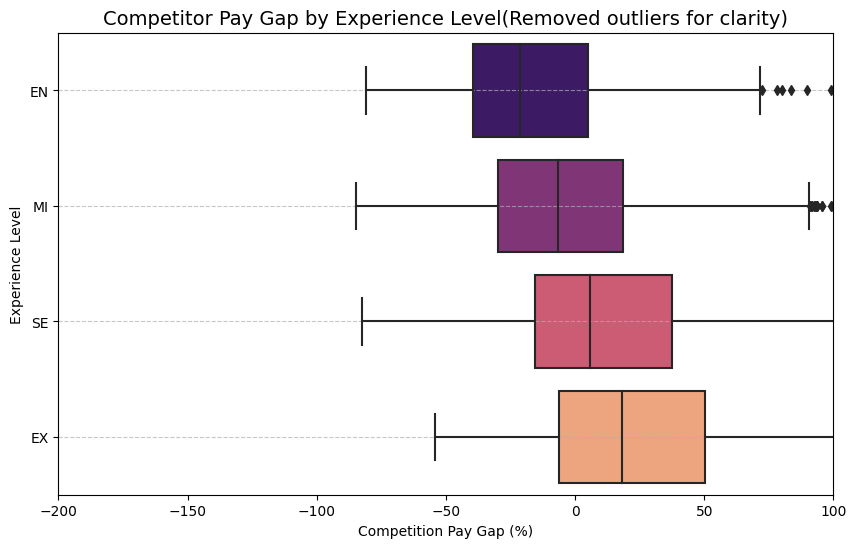

In [23]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_sampled, y="experience_level", x="competition_pay_gap", palette="magma", order = ["EN","MI","SE","EX"])
plt.title("Competitor Pay Gap by Experience Level(Removed outliers for clarity)", fontsize=14)
plt.ylabel("Experience Level")
plt.xlabel("Competition Pay Gap (%)")
plt.xlim(-200,100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Key Insights: Competitor Pay Comparison

- Median pay for Entry level and Mid level employee is lower than the competitors.
- Median pay for Senior and executives is higher than the competitors.
- Mean Pay Gap: 6.74%, meaning our company's salaries are slightly above competitor rates on average.
- Median Pay Gap: 0%, meaning half of employees earn same as competitors' median salaries.
- 25th Percentile: -23.12%, indicating 25% of employees earn at least 23% less than market competitors.
- 75th Percentile: 29.89%, suggesting 25% of employees earn significantly more than competitors.
- Minimum Pay Gap: -84.89%, meaning some employees earn almost 85% below market rate.
- Maximum Pay Gap: 811%, showing that we are paying almost 8 times more salary for some roles than our competitor.


This analysis indicates we are better than our competitor in overall but some salary gaps exists across job titles, specially in entry and mid level positions. We may need to perform some salary corrections to retain top talent and also review some high paid positions for position upgrade.

### Title wise Competitor Pay Gap

In [24]:
grouped_title = df_sampled.groupby("job_title")["competition_pay_gap"].mean().rename("avg_competitor_pay_gap").reset_index()

top_5_high = grouped_title.nlargest(5, "avg_competitor_pay_gap")[["job_title","avg_competitor_pay_gap"]]
bottom_5_low = grouped_title.nsmallest(5, "avg_competitor_pay_gap")[["job_title","avg_competitor_pay_gap"]]

# Rename columns for better presentation
top_5_high.columns = ["Top 5 Job Titles", "Competitor Pay Gap"]
bottom_5_low.columns = ["Bottom 5 Job Titles", "Competitor Pay Gap"]

top_bottom_df = pd.concat([top_5_high.reset_index(drop=True), bottom_5_low.reset_index(drop=True)], axis=1)


tools.display_dataframe_to_user(name="Title wise pay gap", dataframe=top_bottom_df)

Title wise pay gap


#### Key Insights:

- Titles such as Data Quality Specialist, ML architect, data integration analyst, data operations manager, and member of technical staff are earning half to 8 times less in average than the median competitors salary.
- We are providing well above our competitors salary, in average, for our ML developers, Head of AI, Data visualization engineer, principal statistical programmer, and prompt engineer. 

If proper action is not taken to retain the low paid positions, they might move onto our competitors.

### 3.7: Salary Benchmarking

Employee salaries against market percentiles to identify salary competitiveness.

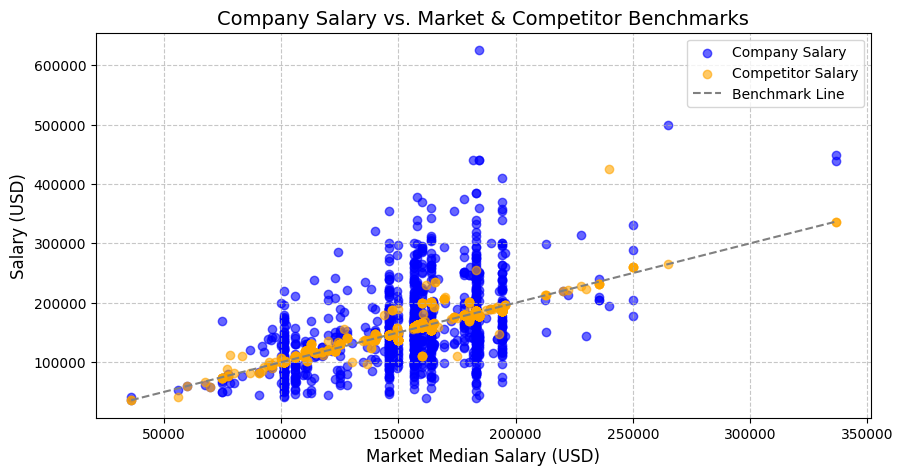

In [25]:
plt.figure(figsize=(10, 5))
sampled_subset = df_sampled.sample(n=1000, random_state=42)  # Random subset to avoid overcrowding
plt.scatter(sampled_subset["market_median_salary"], sampled_subset["salary_in_usd"], alpha=0.6, label="Company Salary", color="blue")
plt.scatter(sampled_subset["market_median_salary"], sampled_subset["competitor_median_salary"], alpha=0.6, label="Competitor Salary", color="orange")
plt.plot([sampled_subset["market_median_salary"].min(), sampled_subset["market_median_salary"].max()],
         [sampled_subset["market_median_salary"].min(), sampled_subset["market_median_salary"].max()],
         linestyle="dashed", color="gray", label="Benchmark Line")
plt.title("Company Salary vs. Market & Competitor Benchmarks", fontsize=14)
plt.xlabel("Market Median Salary (USD)", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

### 3.8: Compensation Metrices by Job Titles

In [26]:
# Group by job title and calculate key metrics
job_title_analysis = df_sampled.groupby("job_title").agg(
    avg_salary=("salary_in_usd", "mean"),
    median_salary=("salary_in_usd", "median"),
    compa_ratio=("compa_ratio", "mean"),
    range_penetration=("range_penetration", "mean"),
    internal_pay_equity=("internal_pay_equity_ratio", "mean"),
    competitor_pay_gap=("competition_pay_gap", "mean")
).reset_index()

tools.display_dataframe_to_user(name="Job Title-Based Compensation Metrics", dataframe=job_title_analysis)

Job Title-Based Compensation Metrics


This tool can be used to search for specific job title and their specific metrics too.

# Closing the Compensation Mystery: What We’ve Uncovered

### As we step back from the numbers and reflect on this deep dive into compensation, pay equity, and market competitiveness, the findings are both eye-opening and thought-provoking.

1. Some employees are significantly underpaid—earning below 80% of market rates, posing a retention risk.
2. Others are overcompensated, with salaries exceeding 80% of competitors' pay, raising questions about salary structure efficiency.
3. Remote employees, on average, earn slightly less than their in-office counterparts, suggesting that location-based pay adjustments are in effect.
4. Pay inequities exist even within the same job title, meaning some employees are earning disproportionately more than their peers—potentially eroding trust in the compensation system.
5. Competitor salaries are edging ahead in some critical job roles, signaling a need for salary adjustments to stay competitive in hiring and retention.

#### The final takeaway? Compensation isn’t just about numbers—it’s about fairness, strategy, and business sustainability. It affects the "humans" who are working with us. 

### A well-balanced salary structure can attract top talent, retain key employees, and build a culture of trust. But left unchecked, pay disparities can lead to turnover, dissatisfaction, and lost competitive edge.

## This analysis serves as a wake-up call: Are we paying our employees what they truly deserve? And if not—what are we going to do about it? 🚀